# phase correlation

((600, 800, 3), (768, 1024, 3), (768, 1366, 3))

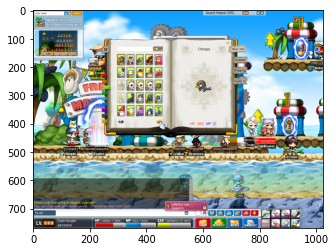

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from pathlib import Path

screenshots = sorted(Path("../data/raw/resolutions").glob("*"))
hdclient_0, hdclient_1, hdclient_2 = [mpimg.imread(p, format="jpg") for p in screenshots]
client = [hdclient_0, hdclient_1, hdclient_2]
imgplot = plt.imshow(hdclient_1)

client[0].shape, client[1].shape, client[2].shape

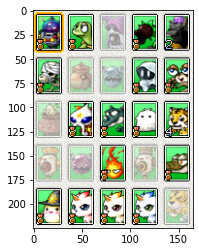

(225, 165, 3)

In [2]:
def imshow(img):
    plt.imshow(img, cmap=plt.get_cmap("gray"))
    plt.show()
    
CROP_SHAPE = (225, 165)

def crop_win(img):
    x, y = 152, 295
    cropped = img[x:x+CROP_SHAPE[0], y:y+CROP_SHAPE[1]]
#     assert cropped.shape[:2] == CROP_RES, cropped.shape
    return cropped

def crop_mac(img):
    x, y = 412, 569
    cropped = img[x:x+CROP_SHAPE[0]*2, y:y+CROP_SHAPE[1]*2]
    assert cropped.shape[:2] == (CROP_SHAPE[0]*2, CROP_SHAPE[1]*2), cropped.shape
    return cropped

def crop(img):
    if img.shape[:2] not in ((600, 800), (768, 1024), (768, 1366)):
        return crop_mac(img)
    else:
        return crop_win(img)

img = crop(client[0])
imshow(img)
img.shape

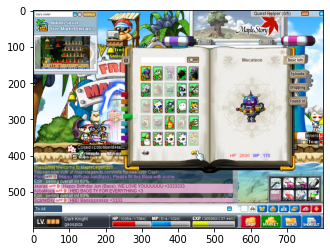

In [4]:
imshow(client[0])

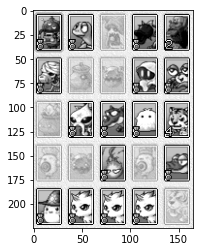

In [90]:
from scipy import fft
from scipy.signal import convolve2d

def rgb2gray(rgb):
    return (np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])*255).astype(float)

# might need some smoothing
def sobel_filter(img):
    kernel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    kernel_y = kernel_x.T
    x = convolve2d(img, kernel_x) + convolve2d(img, kernel_y)
    x[x < 0] = 0
    x[x > 0] = 255
    return x

# large = sobel_filter(rgb2gray(client[0]))
# cropped = sobel_filter(rgb2gray(crop(client[0])))
large = rgb2gray(client[0])
cropped = rgb2gray(crop(client[0]))
imshow(cropped)

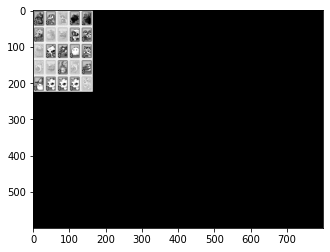

In [94]:
padded = np.ones(large.shape)
#i, j = large.shape
i, j = 0, 0
padded[i//2:i//2+cropped.shape[0], j//2:j//2+cropped.shape[1]] = cropped
imshow(padded)

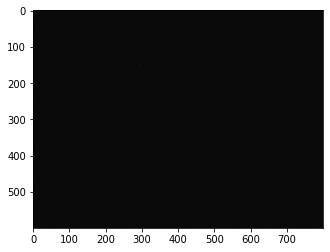

In [95]:
x = fft.fft2(large)
y = fft.fft2(padded)
correlation = fft.ifft2((x * np.conjugate(y))/np.abs(x * np.conjugate(y)))
imshow(np.real(correlation))

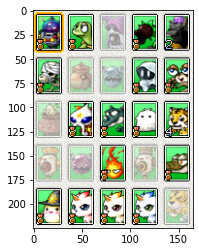

In [98]:
z = np.abs(correlation)
i, j = np.where(z == np.amax(z))
i = i[0]
j = j[0]
i, j
imshow(client[0][i:i+CROP_SHAPE[0], j:j+CROP_SHAPE[1]])